### Target variable - Promoted

#### In this dataset we have to make prediction on whether a person is promoted or not

Importing various libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
e = pd.read_csv('./Downloads/employee.csv')
e.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
e.shape

(54808, 14)

In [4]:
e.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
e.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


From above we can conclude that dataset have 54808 rows and 14 columns. Also in 2 columns of the dataset have null values. 
Also from the describe we get knowledge of various percentiles of various columns of dataset

1. employee_id

In [6]:
e['employee_id'].unique()

array([65438, 65141,  7513, ..., 13918, 13614, 51526], dtype=int64)

we won't be able to extract from this column as it is just unique number for every employee.

2. department

In [7]:
e['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

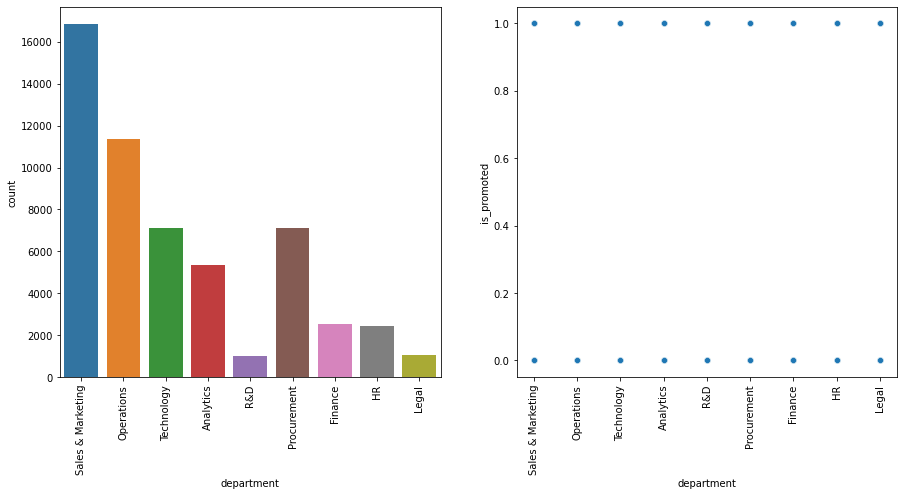

In [8]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['department'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'department', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most number of employees are in sales & marketing department.

3. Region

In [9]:
e['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

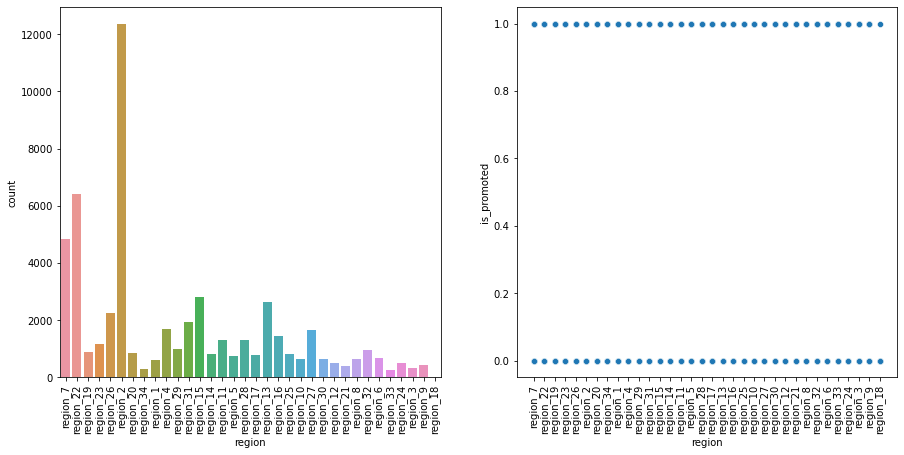

In [10]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['region'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'region', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most number of employees are in region_2

4. education

In [11]:
e['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Filling null values

In [12]:
e['education'] = e['education'].fillna(method= 'ffill')
e['education'] = e['education'].fillna(method= 'bfill')

In [13]:
e['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

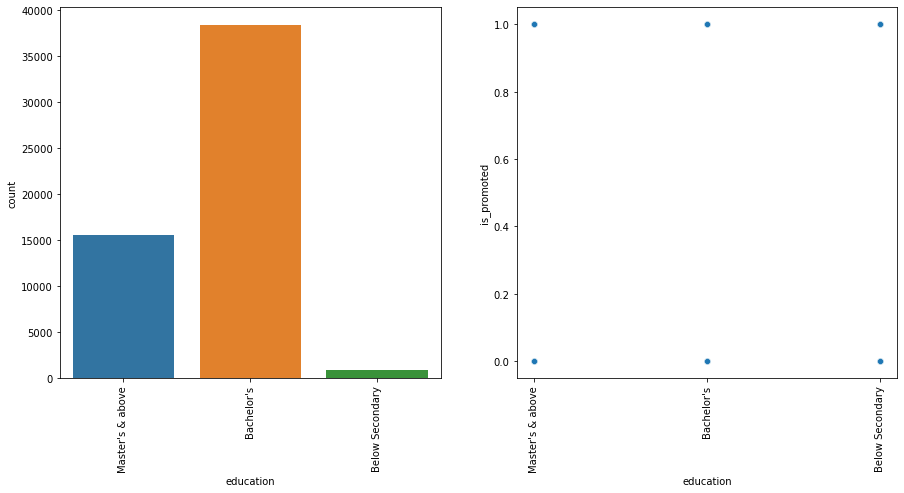

In [14]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['education'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'education', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most of employees have completed bachelor's as their education.

5. gender

In [15]:
e['gender'].unique()

array(['f', 'm'], dtype=object)

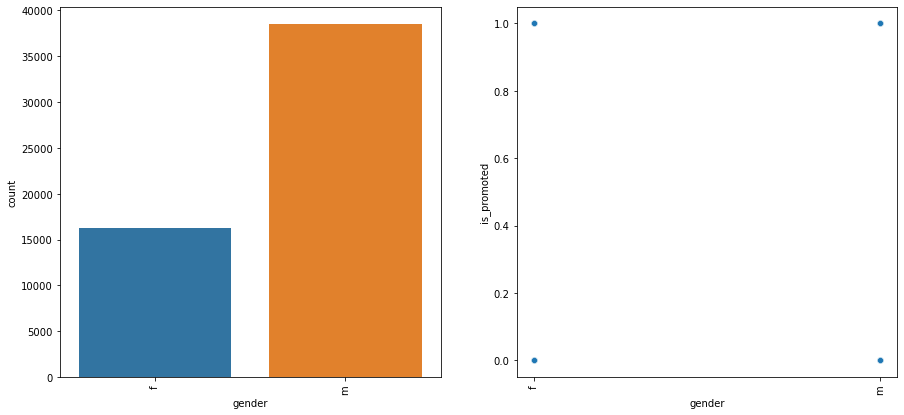

In [16]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['gender'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'gender', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most number of employees in organisation are males.

6. recruitment_channel

In [17]:
e['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

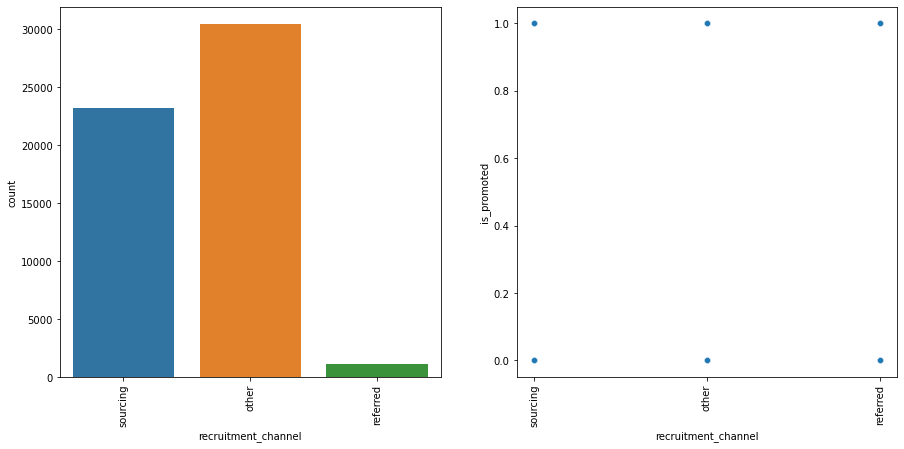

In [18]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['recruitment_channel'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'recruitment_channel', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most employees came in organisation using other recruitment channel.

7. age

In [19]:
e['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

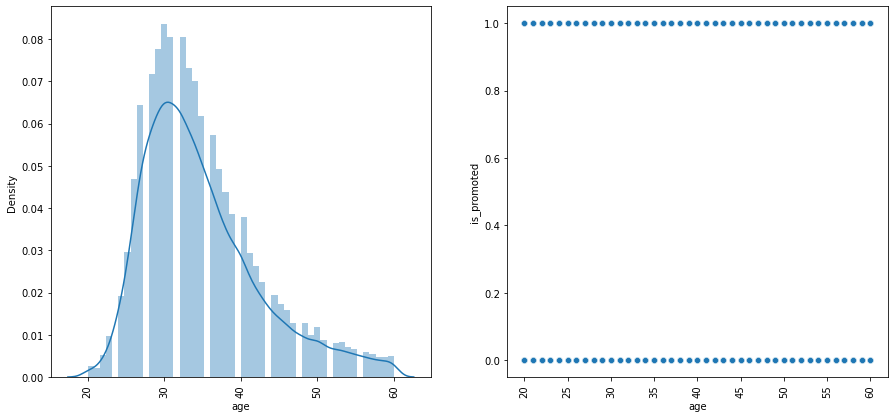

In [20]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(e['age'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'age', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we conclude that most number of employees have age around 28 or 29.

8. previous_year_rating

In [21]:
e['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

Filling null values

In [22]:
e['previous_year_rating'] = e['previous_year_rating'].fillna(method= 'bfill')
e['previous_year_rating'] = e['previous_year_rating'].fillna(method= 'ffill')

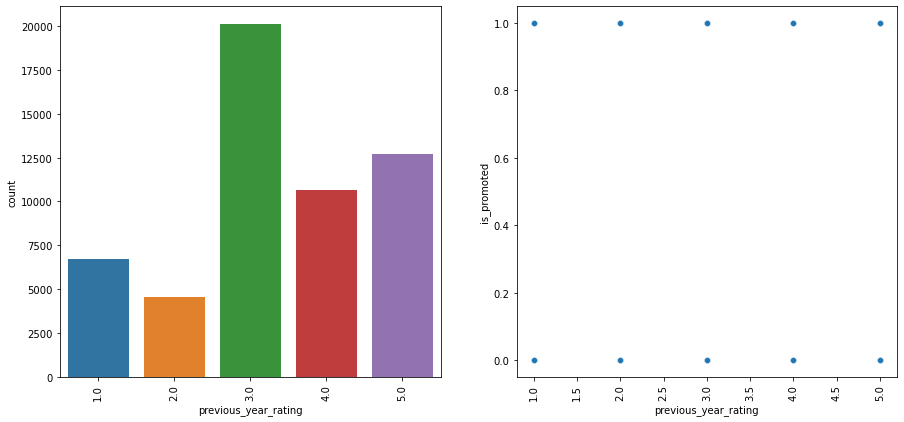

In [23]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['previous_year_rating'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'previous_year_rating', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most number of employees have previous year rating.

9. length_of_service

In [24]:
e['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

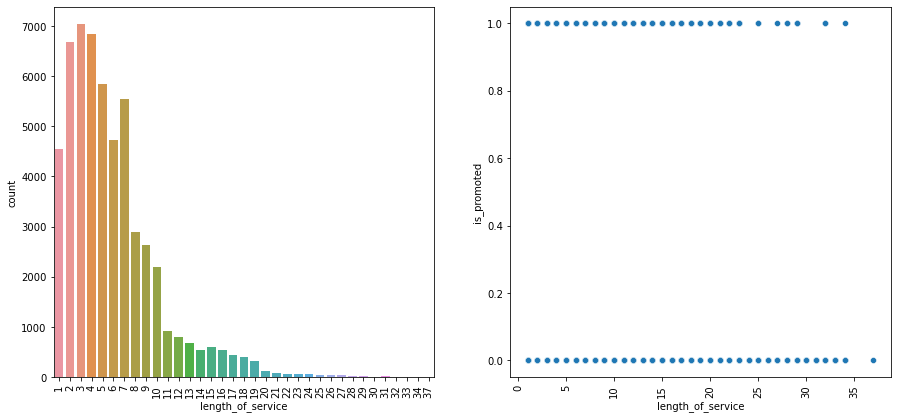

In [25]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['length_of_service'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'length_of_service', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most number of employees have 3 years in length of service and employees above 35 years of length of service did not get any promotion.

10. KPI's met > 80% 

In [26]:
e['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

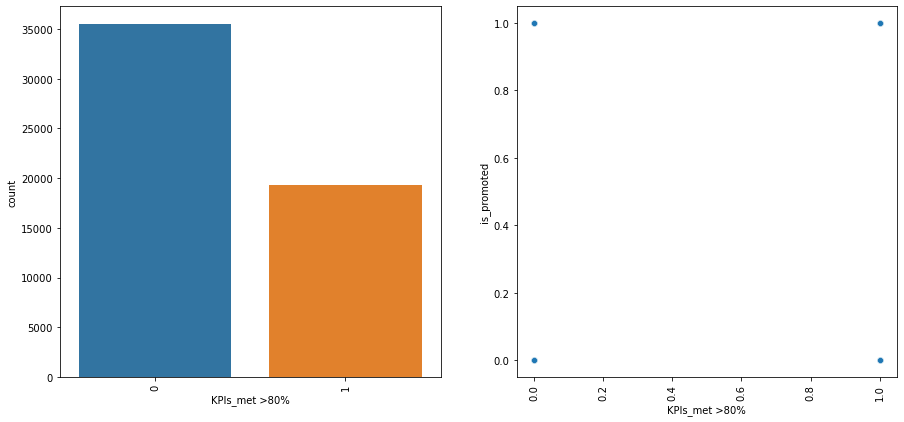

In [27]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['KPIs_met >80%'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'KPIs_met >80%', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most employees have 0 KPIs_met > 80%.

11. awards_won?

In [28]:
e['awards_won?'].unique()

array([0, 1], dtype=int64)

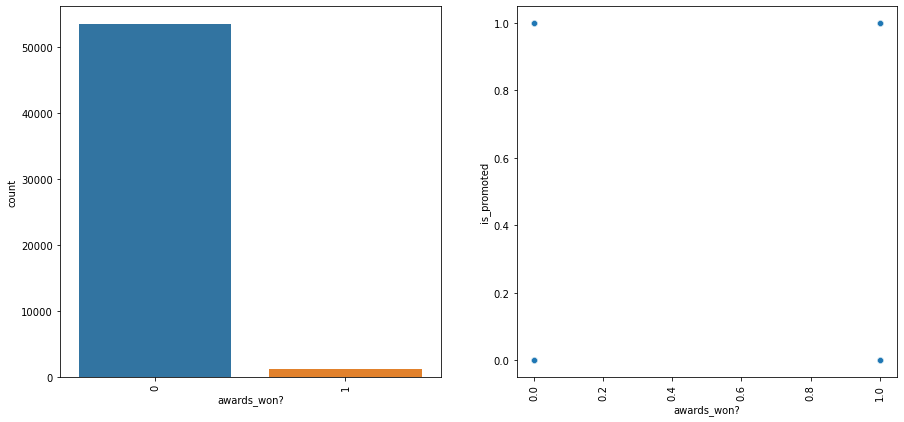

In [29]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(e['awards_won?'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'awards_won?', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most employees have not won any awards.

12. avg_training_score

In [30]:
e['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

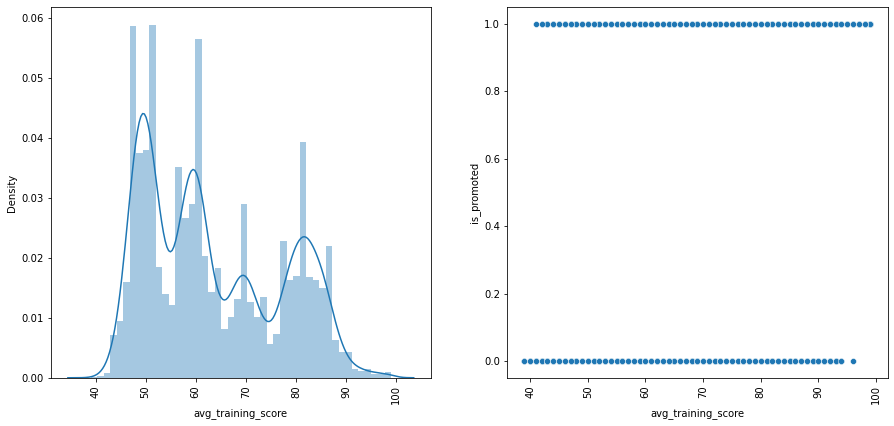

In [32]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(e['avg_training_score'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'avg_training_score', y= 'is_promoted', data= e)
plt.xticks(rotation= 90)
plt.show()

From above we can deduce that most employees have around 50 avg_training_score.

#### Now changing data type of every variable to int.

In [33]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [34]:
e['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [35]:
e['department'] = e['department'].replace(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
                                           'R&D', 'Procurement', 'Finance', 'HR', 'Legal'],[0,1,2,3,4,5,6,7,8])

In [36]:
e['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [37]:
a = []
for i in e['region']:
    i = i[-2:]
    a.append(i)

In [39]:
e['region'] = pd.Series(a)

In [41]:
e['region'] = e['region'].str.replace('_','')

In [42]:
e['region'] = pd.to_numeric(e['region'])

In [43]:
e['region'].unique()

array([ 7, 22, 19, 23, 26,  2, 20, 34,  1,  4, 29, 31, 15, 14, 11,  5, 28,
       17, 13, 16, 25, 10, 27, 30, 12, 21,  8, 32,  6, 33, 24,  3,  9, 18],
      dtype=int64)

In [44]:
e['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [45]:
e['education'] = e['education'].replace(["Master's & above", "Bachelor's", 'Below Secondary'],[0,1,2])

In [46]:
e['gender'].unique()

array(['f', 'm'], dtype=object)

In [47]:
e['gender'] = e['gender'].replace(['f','m'],[0, 1])

In [48]:
e['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [49]:
e['recruitment_channel'] = e['recruitment_channel'].replace(['sourcing', 'other', 'referred'],[0,1,2])

In [50]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int64  
 2   region                54808 non-null  int64  
 3   education             54808 non-null  int64  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int64  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 MB


After converting every variable to numeric data type now we have to create the heatmap to check the every variable correlation with respect to target variable.

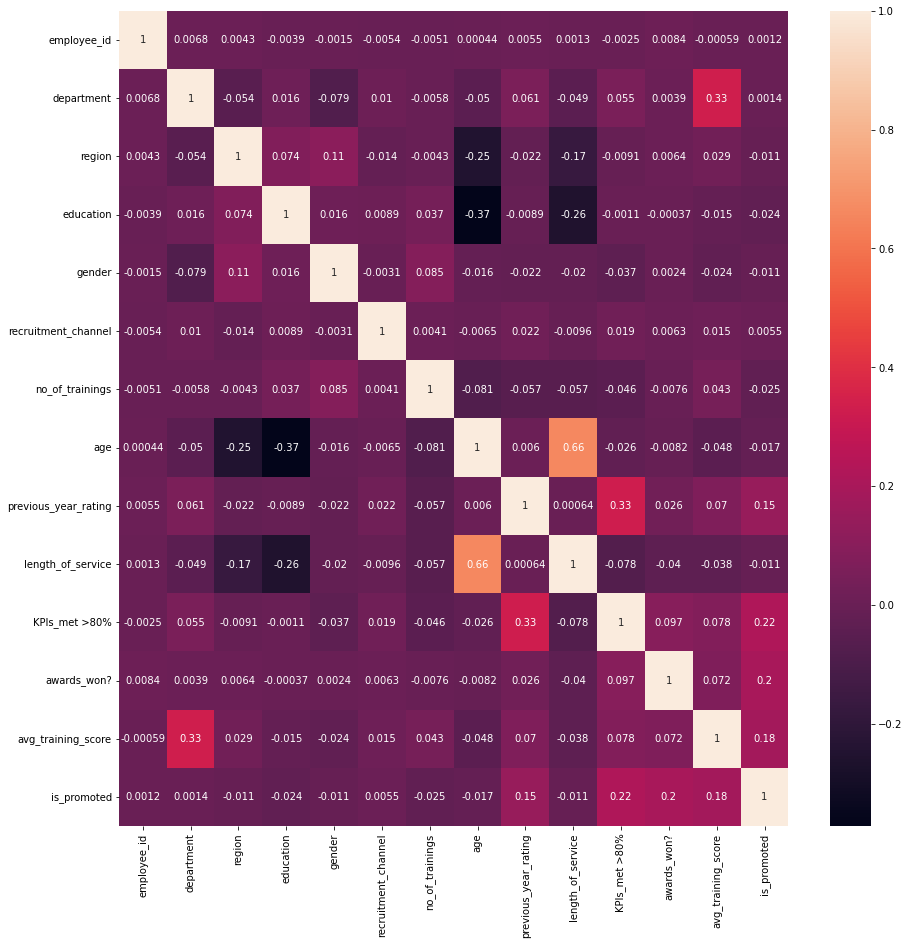

In [52]:
plt.figure(figsize= [15, 15])
sns.heatmap(e.corr(), annot= True)
plt.show()

As we can see that except few columns rest of the columns have very less correlation with respect to target column. So we can drop few columns who have less correlation with target column but in real world you cannot drop any column as data is very precious to client.

In [53]:
b = e.drop(['department', 'age', 'length_of_service'], axis= 1)

#### Splitting data into train and test

In [54]:
x = b.drop(['is_promoted'], axis= 1)
y = b['is_promoted']

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 123)

#### Scaling the data to normalize it

In [56]:
scaler = StandardScaler()

In [57]:
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

#### Using GridsearchCV for finding the best algorithm

In [58]:
lr = LogisticRegression()

In [59]:
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [60]:
lrf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [61]:
lrf.score(xtrainscaled, ytrain)

0.9159976645745147

In [62]:
lrf.best_params_

{'C': 1}

In [63]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [64]:
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [65]:
dtf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [66]:
dtf.score(xtrainscaled, ytrain)

0.9235148153554226

In [67]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

#### we can check randomforrest algorithm also on this but i chose not to as it is very time consuming. So i am going with Decision tree.

In [68]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 4, min_samples_split= 2)

In [69]:
pred = dt.fit(xtrainscaled, ytrain).predict(xtestscaled)

In [70]:
df = pd.DataFrame({'Actual': ytest, 'Prediction': pred})
df.head()

,Actual,Prediction
47235,0,0
86,0,0
13878,0,0
12473,0,0
53518,0,0


#### Now checking the algorithm is good for the dataset or not by applying various metrices.

In [72]:
print('accuracy score : ', metrics.accuracy_score(ytest, pred))

accuracy score :  0.9254123485622537


In [76]:
print('confusion matrix : ')
metrics.confusion_matrix(ytest, pred)

confusion matrix : 


array([[12537,    25],
       [  997,   143]], dtype=int64)

#### By looking at the metrics score we can observe that the decision tree prediction model is good for this dataset. Now save this model

In [77]:
h = pickle.dumps(dt)

#### Hence the prediction has been made successfully